In [28]:
from itertools import product
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

def sum_pairs(S):
    pairs = []
    for i in range(S+1):
        pair = np.array([i, S-i])
        pairs.append(pair)
    return pairs


def get_strategies(N, S):
    pure_strats = []
    #First battlefield value is i
    for i in range(S+1):
        #Other battlefields 
        #values 
        for j in sum_pairs(S -i):
            pure_strats.append(tuple(np.insert(j, 0, i)))
    return((pure_strats))

ids = np.arange(0, 21)
strats = get_strategies(3, 5)


In [32]:
def select_strat(strats, regret_vector):
    # if all zeros in vector - make uniform probability distribution
    if np.count_nonzero(regret_vector) == 0:
        prob_vec = np.ones(21)

    # turn regret vector into probability vector if not all zeros.
    else:
        prob_vec = regret_vector
    
    play = random.choices(ids, weights = prob_vec)
    return strats[play[0]], play


def aggregate_payoff(p1_move, p2_move):

    p1_wins = 0
    p2_wins = 0
    for p1, p2 in zip(p1_move, p2_move):
        if p1 > p2:
            p1_wins += 1
        elif p2 > p1:
            p2_wins += 1

    if p1_wins > p2_wins:
        return +1
    elif p2_wins > p1_wins:
        return -1
    else:
        return 0
    
    
    
def update_regret_vector(regret_vector, strats, p1_strat, p2_strat, t):

    game_payoff = aggregate_payoff(p1_strat, p2_strat)

    #Iteratively updating the regret vector
    updated_regret_vector = [
        val + (aggregate_payoff(strats[idx], p2_strat) -
               game_payoff) for idx, val in enumerate(regret_vector)
    ]

    # Make negative numbers zero 
    pos_regret_vector = [val if val > 0 else 0 for val in updated_regret_vector]

    return pos_regret_vector

In [34]:
n_iter = 100000
N = 3
S = 5

p1_moves = get_strategies(N, S)
p2_moves = get_strategies(N, S)

p1_regret = np.zeros(21)
p2_regret = np.zeros(21)

p1_average_strategy = np.zeros(21)
p2_average_strategy = np.zeros(21)

regret_list = []

joint_actions = []
for t in range(n_iter):
    #Picking new strategy
    p1_move, p1_index = select_strat(p1_moves, p1_regret)
    p2_move, p2_index = select_strat(p2_moves, p2_regret)
    
    #Counter for strategies used
    p1_average_strategy[p1_index] += 1
    p2_average_strategy[p2_index] += 1

    #Store joint distribution
    joint_actions.append((p1_index[0], p2_index[0]))

    #How quick does the regret go to 0?
    sum_regret = 0
    p1_pos_regret = [val if val > 0 else 0 for val in p1_regret]
    p2_pos_regret = [val if val > 0 else 0 for val in p2_regret]
    regret_list.append(sum(np.array(p1_pos_regret)))

    #Update regret
    p1_regret = update_regret_vector(p1_regret, p1_moves,
                                            p1_move, p2_move, t)
    p2_regret = update_regret_vector(p2_regret, p2_moves,
                                            p2_move, p1_move, t)
    

joint_dist = np.zeros((21,21))
i = 0
for x in list(Counter(joint_actions)):
    joint_dist[x[0]][x[1]] = list(Counter(joint_actions).values())[i]
    i += 1

joint_dist = joint_dist/n_iter



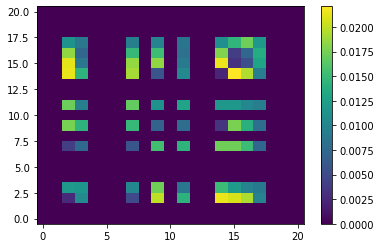

In [21]:
x = np.arange(0, 21)
y = np.arange(0, 21)
lX,lY = np.meshgrid(x,y)


plt.pcolormesh(lX,lY,joint_dist)
plt.colorbar()

plt.show()


In [22]:
score = []
for i in range(21):
    for j in range(21):
            score.append(np.sum(np.array(strats[i]) > np.array(strats[j])))

score = np.array(score)
payoff = score.reshape(21, 21)
payoff -= np.transpose(payoff)



def rowsums(i,i_):
    total1 = 0
    total2 = 0
    for k in range(21):
        total1 += payoff[i][k] * joint_dist[i][k]
        total2 += payoff[i_][k] * joint_dist[i][k]

    return total1, total2

def isCE(mat):
    sums = []
    indexes1 = []
    indexes2 = []

    for i in range(21):
        for i_ in range(21):
            if rowsums(i,i_)[1] > rowsums(i,i_)[0]:
                sums.append(rowsums(i,i_))
                indexes1.append((i,i_))

    return sums, indexes1


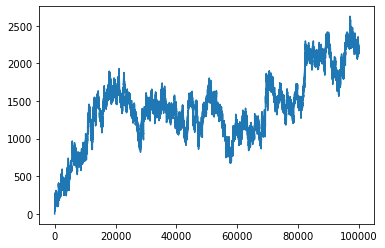

In [36]:
plt.plot([i for i in range(n_iter)], regret_list)
plt.show()

In [ ]:
def select_strat(strats, regret_vector):
    # if all zeros in vector - make uniform probability distribution
    if np.count_nonzero(regret_vector) == 0:
        prob_vec = np.ones(21)

    # turn regret vector into probability vector if not all zeros.
    else:
        prob_vec = regret_vector
    
    play = random.choices(ids, weights = prob_vec)
    return strats[play[0]], play